In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.animation as animation
import matplotlib.pyplot as plt

In [4]:
%matplotlib widget

In [5]:
class StatesTotalEMap:
    
    def __init__(self, crs_epsg: int = 4326):

        # load data; geometries are in crs: EPSG 4326 (lat/lon)
        self.us_polygons = gpd.read_file('../../data/derived/us_state_polygons.geojson')
        self.world_polygons = gpd.read_file('../../data/derived/world_polygons.geojson')
        self.cities = gpd.read_file('../../data/derived/us_cities_population_fraction.geojson')
        self.total_e = gpd.read_file('../../data/derived/state_year_total_e.csv')

        # process data
        self.cities = self.cities.merge(self.total_e, how = 'inner', left_on='state', right_on='StateCode')
        self.cities['state_energy'] = self.cities['Data'].astype('float')
        self.cities['energy_used'] = self.cities['state_energy']*self.cities['population_fraction_in_state']
        self.cities['Year'] = self.cities.Year.astype('int32')

        # set crs
        if crs_epsg!=4326:
            self.crs_epsg = crs_epsg
            self.__apply_crs()
        else:
            self.crs_epsg = 4326

        self.__add_scaling_factor(energy_max_value=2663540.0,
                                marker_max_size=12.0,
                                marker_min_size = 0.001)
        
        

    def __add_scaling_factor(self, energy_max_value=2663540.0,
                                marker_max_size=1000.0,
                                marker_min_size = 0):
        scaling_factor = (marker_max_size / energy_max_value) + marker_min_size
        self.cities['marker_size'] = scaling_factor * self.cities['energy_used']
        print(f'{scaling_factor=}')

    def __apply_crs(self):
        for df in [self.cities, self.us_polygons, self.world_polygons]:
            df.to_crs(self.crs_epsg, inplace=True)
            print("updated {df}")


    def plot_year(self, year):
        fig, ax = plt.subplots(figsize=(6, 4), facecolor='black')

        self.world_polygons.plot(ax=ax, color='dimgray', edgecolor='white', linewidth=0.3)
        self.us_polygons.plot(ax=ax, color='dimgray', edgecolor='white', linewidth=0.3)
        tmp = self.cities[self.cities['Year']==year]
        tmp.plot(ax=ax, markersize=tmp.marker_size, color='yellow', alpha=0.2)
        # for now, let's stick with CONUS
    
        # ax.set_ylim([23, 52]) # for epsg: 4326, to cover CONUS
        # ax.set_xlim([-130, -65]) # epsg: 4326, to cover CONUS

        # for epsg=9311:
        # array([-5676328.81541392, -2109808.3042863 ,  2430922.83024773, 2911423.62375145])
        # # minx  miny  maxx  maxy
        # ax.set_xlim([-2217000, 2745000])
        # ax.set_ylim([-2362000, 907000])

        ax.set_facecolor('lightslategrey')
        ax.set_title(f'Year: {year}, epsg: {self.crs_epsg}', color='gold')


updated {df}
updated {df}
updated {df}
scaling_factor=0.0010045052824436652


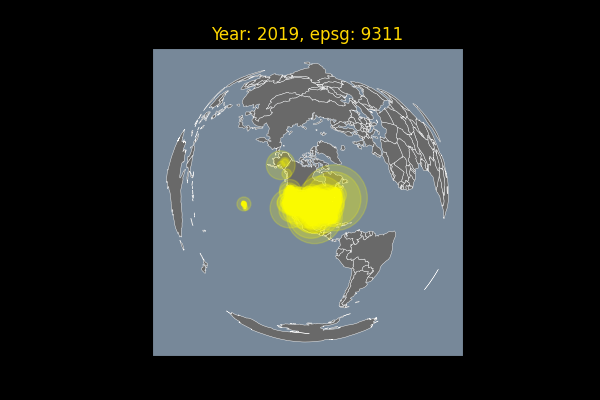

In [7]:
map = StatesTotalEMap(9311)
map.plot_year(2019)